<img src="https://i.ytimg.com/vi/h5SNAluOj6U/maxresdefault.jpg" width="500" align = "left"
/>




# Do or do not: This is a Binary Classification


#### *Isaiah Westphalen*
______

Background: Reddit and Subbreddits
================

[Reddit](https://www.reddit.com/) is a social media site that collects forums dedicated to specific subjects where users can publish images, text, and videos. Each specific forum is referred to as a subreddit, and is dedicated to the discussion of one subject. For example, the [r/tea](https://www.reddit.com/r/tea/) subreddit is mostly made up of users' pictures of tea, and [r/WritingPrompts](https://www.reddit.com/r/WritingPrompts) is full of users' text submissions.  

Problem Statement
====================


Given two subreddits, what models can be used to determine if a body of text came from one or the other, and what specific characteristics of that text make it more likely to be from that subreddit.

This could be used by websites such as Reddit for ad campaigning, or just generally trying to get an idea of what subject a person will be interested in based on a sample of their text. This model could tell websites who's viewing a specific page, what types of things they might like, or what other sites they might be going to.

-------

## The Subs in Question:
In order to gather data, we'll be using posts and comments scraped from the subreddits:

### r/prequelmemes

<img src="https://drive.google.com/uc?export=view&id=1C0R4SUTTAALPFJPNj8yX6mKSfUhnqT3V" style="width: 650px; max-width: 100%; height: auto" title="Click to enlarge picture" />

A subreddit dedicated to sharing [memes](https://en.wikipedia.org/wiki/Meme) relating to the [prequel Star Wars movies](https://en.wikipedia.org/wiki/Star_Wars_prequel_trilogy). And:
    

### r/marvelmemes    
    
<img src="https://drive.google.com/uc?export=view&id=1NgSqdDXvI6ZFsGuYcvme2ob8UT56XNwC" style="width: 650px; max-width: 100%; height: auto" title="Click to enlarge picture" />    

A subreddit dedicated to sharing memes relating to [Marvel Entertainment](https://en.wikipedia.org/wiki/Marvel_Entertainment).
    

## Getting the Data
________

####       Initial imports (other python modules will be added as needed):

In [ ]:
import numpy as np
import pandas as pd
import requests
from time import time

#### First we'll start with getting information from reddit posts. Using Pushshift's API, we can get the data we need for our modeling:
    
Starting with the prequelmemes subreddit, we can request the post information, convert it to Json and store it to a csv. We'll also do this for the marvelmemes subreddit. In order to get the amount of data needed, we'll start by scraping the maximum number of posts [Pushshift](https://github.com/pushshift/api) allows us, before the time 1615867421 (Tuesday, March 16, 2021 4:03:41 AM), and then move to the previous 24 hour period and repeat the process.

In [ ]:
url = 'https://api.pushshift.io/reddit/search/submission'
params = {'subreddit':'prequelmemes', 'size':499,'before':1615867421}
fail = 0
succ = 0
for i in range(1,100000):
    
    try:
        
        res = requests.get(url,params)
        data = res.json()
        posts = data['data']
        df = pd.DataFrame(posts)
        df.to_csv(f'dfs/df{succ}.csv', index=False)
        params['before']=params['before']-86400
        succ+=1
        if succ%100==0:
            print(f'starting successful csv # {succ}')
        if succ == 2000 or succ>2000:
            break
    except:
        fail+=1
        if fail%100==0:
            print(f'failure # {fail}')
        

Now we can make a dataframe using pandas and our csv files. First, we'll import os inorder to generate a list of the files in our posts folder:

In [ ]:
import os

files = [i for i in os.listdir('dfs') if 'df' in i]


Now we can make the first dataframe we'll be using: 

In [ ]:
all_data = pd.read_csv('dfs/df1.csv')
succ = 0
for i in files:
    try:
        if i !='df1.csv':
            df = pd.read_csv('dfs/'+i)
            all_data=pd.concat([all_data,df])
            succ+=1
        if succ%100==0:
            print(f'finished concat # {succ}')
        
    except:
        pass

Repeating the Process for the marvelmemes subreddit:

In [ ]:
url1 = 'https://api.pushshift.io/reddit/search/submission'
param1s = {'subreddit':'marvelmemes', 'size':499,'before':1615867421}
succ_count = 0
fail = 0
for j in range(1,1000000):
    try:
    
        res1 = requests.get(url1,param1s)
        data1 = res1.json()
        posts1 = data1['data']
        df1 = pd.DataFrame(posts1)
        df1.to_csv(f'dfs/dd{j}.csv', index=False)
        param1s['before']=param1s['before']-86400
        succ_count+=1
        if succ_count%100==0:
            print(f'starting successful csv # {succ_count}')
        if succ_count == 2000 or succ_count>2000:
            break
        
    except:
        fail+=1
        if fail%100==0:
            print(f'failure # {fail}')
        

In [ ]:
files1 = [j for j in os.listdir('dfs') if 'dd' in j]
all_data1 = pd.read_csv('dfs/dd1.csv')
succ = 0
for j in files1:
    try:
        if j !='dd1.csv':
            df1 = pd.read_csv('dfs/'+j)
            all_data1=pd.concat([all_data1,df1])
        succ+=1
        if succ%100==0:
            print(f'finished concat # {succ}')
    except:
        pass

#### Now the comments! In order to get more data we'll also be looking at the comments for posts in both subreddits:
Pushshift's API also lets us scrape the comments on posts so we'll follow the same process as above to get the text data needed:


In [ ]:
url2 = 'https://api.pushshift.io/reddit/search/comment'
params2 = {'subreddit':'prequelmemes', 'size':499,'before':1615867421}
succ = 0
fail = 0
t = time()
for j in range(1,1000000):
    
    try:
    
        res2 = requests.get(url2,params2)
        data2 = res2.json()
        posts2 = data2['data']
        df2 = pd.DataFrame(posts2)
        df2.to_csv(f'comments/df_comm{j}.csv', index=False)
        params2['before']=params2['before']-86400
        succ+=1
        if succ%100==0:
            s = time()
            print(f'starting successful csv # {succ}')
            print(f'It has been {time()-t} since the last 100 successes')
        if succ == 2000 or succ>2000:
            break
        
    except:
        fail+=1
        if fail%100==0:
            print(f'It has been {time()-t} since the last 100 fails')
            print(f'failure # {fail}')
        

In [ ]:
files2 = [j for j in os.listdir('comments') if 'df_comm' in j]
all_data2 = pd.read_csv('comments/df_comm1.csv')
succ = 0
t = time()
s = 0
for j in files2:
    try:
        if j !='df_comm1.csv':
            df2 = pd.read_csv('comments/'+j)
            all_data2=pd.concat([all_data2,df2])
        succ+=1
        if succ%100==0:
            s = time()
            print(f'finished concat # {succ}')
            print(f'it has been {s - t} since the last 100 successes')
            t = time()
    except:
        pass

In [ ]:
url3 = 'https://api.pushshift.io/reddit/search/comment'
params3 = {'subreddit':'marvelmemes', 'size':499,'before':1615867421}
succ = 0
fail = 0
t = time()
s = 0
for j in range(1,1000000):
    try:
    
        res3 = requests.get(url3,params3)
        data3 = res3.json()
        posts3 = data3['data']
        df3 = pd.DataFrame(posts3)
        df3.to_csv(f'comments/dd_comm{j}.csv', index=False)
        params3['before']=params3['before']-86400
        succ+=1
        if succ%100==0:
            s = time()
            print(f'starting successful csv # {succ}')
            print(f'it has been {s - t} since the last 100 successes')
            t = time()
        if succ == 2000 or succ>2000:
            break
        
    except:
        fail+=1
        if fail%100==0:
            print(f'failure # {fail}')
            
        

In [ ]:
files3 = [j for j in os.listdir('comments') if 'dd_comm' in j]
all_data3 = pd.read_csv('comments/dd_comm1.csv')
succ = 0
for j in files3:
    try:
        if j !='dd_comm1.csv':
            df3 = pd.read_csv('comments/'+j)
            all_data3=pd.concat([all_data3,df3])
        succ+=1
        if succ%100==0:
            print(f'finished concat # {succ}')
    except:
        pass

### Data Cleaning
______

Now that we have dataframes for all our post and comment data, we can start cleaning it. Here we'll just drop any entry in a dataframe that has null  or [deleted] for its text value. We will also save the resulting dataframe as a csv so once we have gathered all the text data from reddit we won't have to run the previous steps agan:

In [ ]:
all_data['selftext'] = all_data['selftext'].fillna('hello obiwan, my twins have been birthed at last and i am separating them as my final wish')
all_data['selftext'] = all_data['selftext'].replace({'[deleted]':'hello obiwan, my twins have been birthed at last and i am separating them as my final wish'})
all_data = all_data[all_data['selftext']!='hello obiwan, my twins have been birthed at last and i am separating them as my final wish']
all_data.to_csv('prequelmeme_data.csv', index=False)

In [ ]:
all_data1['selftext'] = all_data1['selftext'].fillna('hello obiwan, my twins have been birthed at last and i am separating them as my final wish')
all_data1['selftext'] = all_data1['selftext'].replace({'[deleted]':'hello obiwan, my twins have been birthed at last and i am separating them as my final wish'})
all_data1 = all_data1[all_data1['selftext']!='hello obiwan, my twins have been birthed at last and i am separating them as my final wish']
all_data1.to_csv('marvelmeme_data.csv', index=False)

In [ ]:
all_data2['body'] = all_data2['body'].fillna('hello obiwan, my twins have been birthed at last and i am separating them as my final wish')
all_data2['body'] = all_data2['body'].replace({'[deleted]':'hello obiwan, my twins have been birthed at last and i am separating them as my final wish'})
all_data2 = all_data2[all_data2['body']!='hello obiwan, my twins have been birthed at last and i am separating them as my final wish']
all_data2.to_csv('prequelmemecomms_data.csv', index=False)

In [ ]:
all_data3['body'] = all_data3['body'].fillna('hello obiwan, my twins have been birthed at last and i am separating them as my final wish')
all_data3['body'] = all_data3['body'].replace({'[deleted]':'hello obiwan, my twins have been birthed at last and i am separating them as my final wish'})
all_data3 = all_data3[all_data3['body']!='hello obiwan, my twins have been birthed at last and i am separating them as my final wish']
all_data3.to_csv('marvelmemecomms_data.csv', index=False)

### Natural Language Processing and Modeling
______

Now that we've collected and cleaned our data we need to get it into a format that our classifier models can understand. First we'll make additional imports:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

Now we can read in our data from our saved csv's:

In [ ]:
# in order to reduce computation time later we'll reduce the number of entries we'll take in here
sw_posts = pd.read_csv('prequelmeme_data.csv')
sw_comments = pd.read_csv('prequelmemecomms_data.csv')
sw_comments_2000 = sw_comments[:2000] 
mar_posts = pd.read_csv('marvelmeme_data.csv')
mar_posts=mar_posts[:2000]
mar_comments = pd.read_csv('marvelmemecomms_data.csv')
mar_comments_2000 = mar_comments[:2000]

We have the data, but in order for the modeling to work we need an idea of which subreddit the text is from. Here we'll assign 1 to mean the text was from the marvelmemes subreddit and 0 to mean it was from prequelmemes subreddit (this will be our target column):

In [ ]:
swp_df = sw_posts[['selftext']]
swp_df['is_marvel'] = swp_df['selftext'].map(lambda x:0)

sw_comments_2000['selftext']=sw_comments_2000['body']
swc_df = sw_comments_2000[['selftext']]
swc_df['is_marvel'] = swc_df['selftext'].map(lambda x:0)

marp_df = mar_posts[['selftext']]
marp_df['is_marvel'] = marp_df['selftext'].map(lambda x:1)

mar_comments_2000['selftext'] = mar_comments_2000['body']
marc_df = mar_comments_2000[['selftext']]
marc_df['is_marvel'] = marc_df['selftext'].map(lambda x:1)

all_text = pd.concat([swp_df,swc_df,marp_df,marc_df])

#### Vectorizing:

Here we'll use the built in vectorizer from sklearn, Countvectorizer. This is a bag of words method, which will turn the data into a dataframe where each row represents a text block and each column a word. The values of the dataframe will indicate if a word is in the text block and just how frequently. 

In [ ]:
#Import
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv1 = CountVectorizer(stop_words=stopwords.words('english'),strip_accents='unicode')
all_above = cv1.fit_transform(all_text['selftext'])


In [ ]:
all_above_vec = all_above.toarray()
all_above_df = pd.DataFrame(all_above_vec, columns = cv1.get_feature_names())
all_above_df = all_above_df.reset_index(drop=True)
all_text = all_text.reset_index(drop=True)
all_above_df['is_marvel']=all_text['is_marvel']

Now we have our vectorized dataframe with our our target column!

#### Modeling:

Now that we have everything finished in terms of getting the data into a usable format we'll start modeling. Here we'll use a Random Tree Classifier and 
Logistic Regression to predict whether a body of text is from one subreddit or the other.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

Making our X and y variables and making our training and testing datasets:

In [ ]:
X = all_above_df.drop(columns = 'is_marvel')
y = all_above_df['is_marvel']
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, stratify=y)

Instantiating our initial models:

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
logreg = LogisticRegression(penalty = 'none',max_iter=1000)

Calculating our Baseline model:

In [ ]:
y.value_counts(normalize = True)

1    0.543848
0    0.456152
Name: is_marvel, dtype: float64

Now we can make an initial comparison between the two models:

In [ ]:
print(f'The Random Forest Classifier CV score for the training set: {cross_val_score(rf, X_train, y_train, cv=5).mean()}')
print(f'The Random Forest Classifier CV score for the testing set: {cross_val_score(rf, X_val, y_val, cv=5).mean()}')

print(f'The Logistic Regression CV score for the training set: {cross_val_score(logreg, X_train, y_train, cv=5).mean()}')
print(f'The Logistic Regression CV score for the testing set: {cross_val_score(logreg, X_val, y_val, cv=5).mean()}')


The Random Forest Classifier CV score for the training set: 0.7955061623766538
The Random Forest Classifier CV score for the testing set: 0.7487812462978319
The Logistic Regression CV score for the training set: 0.7773777379216102
The Logistic Regression CV score for the testing set: 0.7591088141215497


From a first look it seems like our Random Forest model might be working better than the Logistic regression, however both models are out performing the baseline and scored similarly.

#### Fine Tuning:
___

Now that we have our initial models we can do a gridsearch in order to determine what the best parameters are:

In [ ]:
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.8000381042479667


{'max_depth': None, 'n_estimators': 200}

In [ ]:
rf1 = RandomForestClassifier(max_depth=None, n_estimators=200)
rf1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
log_params = {
    'C':[0.01,0.1,1,10],
    'solver':['lbfgs', 'liblinear'],
    'penalty' : ['l2', 'none']

}
gc = GridSearchCV(LogisticRegression(max_iter=1000),
                 param_grid=log_params,
                 cv =5)

gc.fit(X_train, y_train)
print(gs.best_score_)
gc.best_params_

In [ ]:
lr = LogisticRegression(C=1, penalty = 'l2', solver='lbfgs')
lr.fit(X_train, y_train)

LogisticRegression(C=1)

### Comparison:
_____

First we'll look at the confusion matrices for both models in order to get a better idea of how they are performing:

In [ ]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

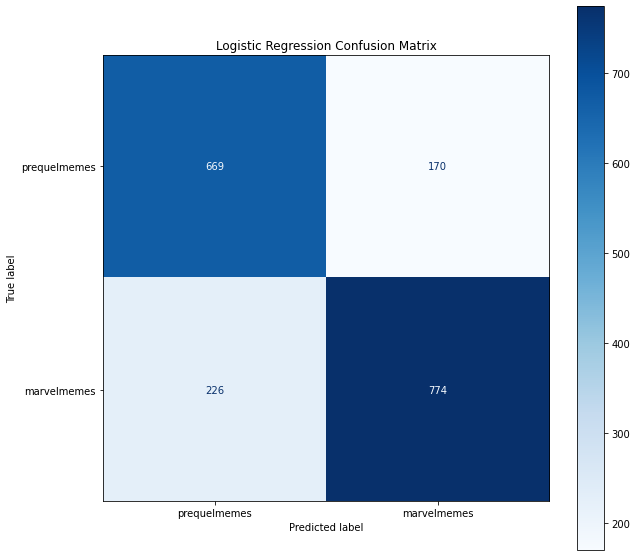

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Logistic Regression Confusion Matrix')
plot_confusion_matrix(lr,X_val, y_val,display_labels=['prequelmemes','marvelmemes'], ax =ax, cmap='Blues');

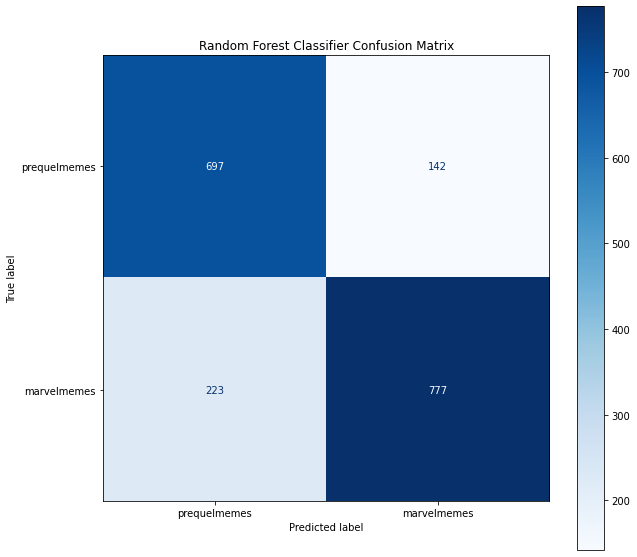

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Random Forest Classifier Confusion Matrix')
plot_confusion_matrix(rf1,X_val, y_val,display_labels=['prequelmemes','marvelmemes'], ax =ax, cmap='Blues');

And now comparing the classification metrics directly:

In [ ]:
lr_preds = lr.predict(X_val)
lr_tn, lr_fp, lr_fn, lr_tp = confusion_matrix(y_val,lr_preds ).ravel()
#ACCURACY
acc_lr = (lr_tp+lr_tn)/(lr_tp+lr_fp+lr_tn+lr_fn)
print(f"The Accuracy for Logistic Regression is: {acc_lr}")
#MISCALSSIFICATION RATE
miss_lr = 1-acc_lr
#SENSITIVITY
sens_lr = lr_tp/(lr_tp+lr_fn)
print(f'The Sensitivity for Logistic Regression is: {sens_lr}')
#SPECIFICITY
spec_lr=lr_tn/(lr_tn+lr_fp)
print(f'The Specificity for Logistic Regression is: {spec_lr}')
#PRECISION
prec_lr = lr_tp/(lr_tp+lr_fp)

The Accuracy for Logistic Regression is: 0.7846655791190864
The Sensitivity for Logistic Regression is: 0.774
The Specificity for Logistic Regression is: 0.797377830750894


In [ ]:
rf1_preds = rf1.predict(X_val)
rf1_tn, rf1_fp, rf1_fn, rf1_tp = confusion_matrix(y_val,rf1_preds ).ravel()
#ACCURACY
acc_rf1 = (rf1_tp+rf1_tn)/(rf1_tp+rf1_fp+rf1_tn+rf1_fn)
print(f'The Accuracy for Random Forest Classifier is: {acc_rf1}')
#MISCALSSIFICATION RATE
miss_rf1 = 1-acc_rf1
#SENSITIVITY
sens_rf1 = rf1_tp/(rf1_tp+rf1_fn)
print(f'The Sensitivity for Random Forest Classifier is: {sens_rf1}')
#SPECIFICITY
spec_rf1=rf1_tn/(rf1_tn+rf1_fp)
print(f'The Specificity for Random Forest Classifier is: {spec_rf1}')
#PRECISION
prec_rf1 = rf1_tp/(rf1_tp+rf1_fp)

The Accuracy for Random Forest Classifier is: 0.8015225666122893
The Sensitivity for Random Forest Classifier is: 0.777
The Specificity for Random Forest Classifier is: 0.8307508939213349


In [ ]:
if acc_lr>acc_rf1:
    print('Logistic Regression is better for accuracy')
    print()
else:
    print('Random Forest Classifier is better for accuracy')
    print()

if miss_lr<miss_rf1:
    print('Logistic Regression is better for missclassification')
    print()
else:
    print('Random Forest Classifier is better for missclassification')
    print()
    
if sens_lr>sens_rf1:
    print('Logistic Regression is better for sensitivity')
    print()
else:
    print('Random Forest Classifier is better for sensitivity')
    print()

if spec_lr>spec_rf1:
    print('Logistic Regression is better for specificity')
    print()
else:
    print('Random Forest Classifier is better for specificity')
    print()

if spec_lr>spec_rf1:
    print('Logistic Regression is better for precision')
    print()
else:
    print('Random Forest Classifier is better for precision')
    print()

Random Forest Classifier is better for accuracy

Random Forest Classifier is better for missclassification

Random Forest Classifier is better for sensitivity

Random Forest Classifier is better for specificity

Random Forest Classifier is better for precision



Now we can compare how many predictions each model got wrong or right:

In [ ]:
right_lr=0
wrong_lr =0
wrong_rf1=0
right_rf1=0
target = [i for i in y_val]
lst_lr = [j for j in lr_preds]
lst_rf1 = [k for k in rf1_preds]
for i in range(len(target)):
    if target[i]!=lst_lr[i]:
        wrong_lr +=1
        
    else:
        right_lr+=1
for i in range(len(target)):
    if target[i]!=lst_rf1[i]:
        wrong_rf1 +=1
        
    else:
        right_rf1+=1
right = [right_lr,right_rf1]
wrong = [wrong_lr,wrong_rf1]

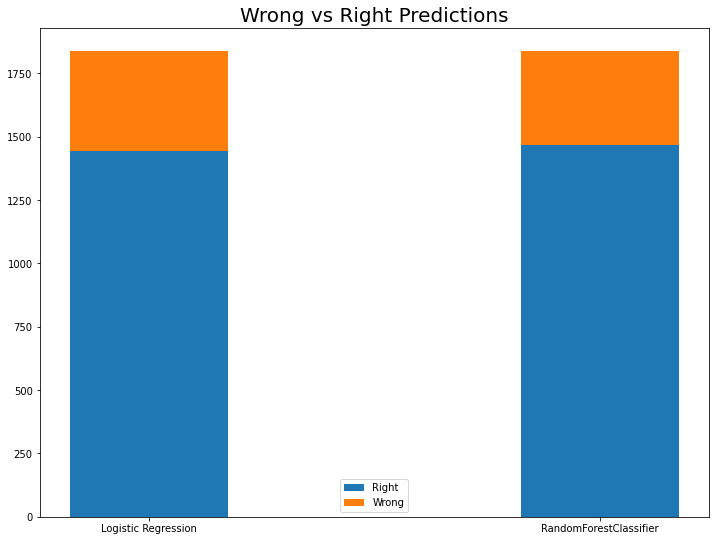

In [ ]:
labels = ['Logistic Regression', 'RandomForestClassifier']

fig, ax = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(12)
ax.bar(labels,right, width = 0.35,label= 'Right')
ax.bar(labels,wrong, width=0.35, label='Wrong', bottom = right)
ax.legend()
ax.set_title('Wrong vs Right Predictions', fontsize=20);

As indicated from our scores, the models seem to be performing similarly, with the Random Forest Classifier doing just slightly better.

### What Words were the most important? 
_____

We can also determine what words had the greatest impact on our models in determining which subreddit a body of text is from:

In [ ]:
list_coef = list(lr.coef_.ravel())
dict_coef = {score:list(all_above_df.columns)[list_coef.index(score)] for score in list_coef}
top10_lr = {}
for i in range(10):
    top10_lr[max(dict_coef)] = dict_coef[max(dict_coef)]
    dict_coef.pop(max(dict_coef))

We can now look at the top ten words that determined the Logistic Regression's predictions:

In [ ]:
top10_lr

{2.3164658201831503: 'marvel',
 2.09053677696773: 'x200b',
 1.9479316645673235: 'extreme',
 1.8845381482625292: 'avengers',
 1.832752566343014: 'ignore',
 1.8268964499316922: 'face',
 1.814795588477559: 'mcu',
 1.7992720520381045: 'marvelmemes',
 1.7706517063483516: 'tony',
 1.7029657795254158: 'hulk'}

And now plotting them:

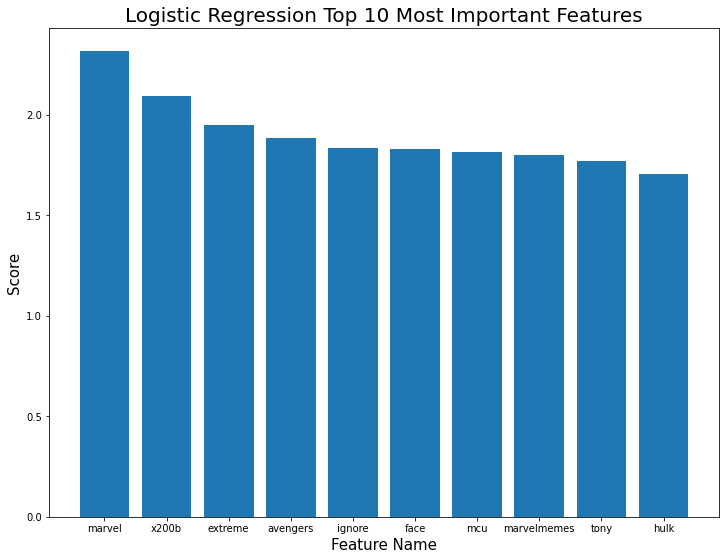

In [ ]:
plt.figure(figsize = (12,9))
plt.bar(x = top10_lr.values(), height=top10_lr.keys())
plt.title('Logistic Regression Top 10 Most Important Features',fontsize = 20)
plt.xlabel('Feature Name', fontsize=15)
plt.ylabel('Score', fontsize=15);

Not so surprising, some of the top words are marvel and marvelmemes. There are also the names of some characters that Marvel owns, and 'mcu' refers to the recent movies Marvel has been releasing. What might give a more interesting picture of whats going on in each subreddit, and to learn more about the personalities of the users, would be to make a list of stop words for the specific subreddits and removing them from the data we're looking at (for example, getting rid of the words 'marvel', 'hulk', etc).

We can do the same for our Random Forest Classifier:

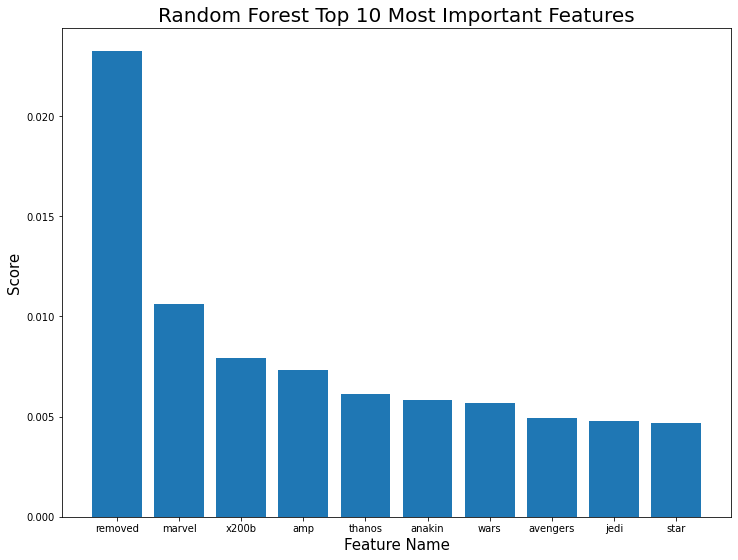

In [ ]:
importance = rf1.feature_importances_
feats = {}
top10 = {}
feats = {score:x for x, score in enumerate(importance)}
for i in range(10):
    score = max(feats)
    word = list(all_above_df.columns)[feats[max(feats)]]
    top10[word] = score
    feats.pop(max(feats))
plt.figure(figsize = (12,9))
plt.bar(x = top10.keys(), height=top10.values())
plt.title('Random Forest Top 10 Most Important Features',fontsize = 20)
plt.xlabel('Feature Name', fontsize=15)
plt.ylabel('Score', fontsize=15);

Here we see a different list of top ten words. Again it's full of words that could be considered stop words for these particular subreddits. Here thought, we have the removed category as well as x200b appearing as high predictors so investigating why that might be would be interesting.


Conclusions
=======
------
The Random Forest Classifier and Logistic Regression with CountVectorizer, while performing similarly in terms of accuracy, both out perform the Baseline model in predicting whether text is from either r/prequelmemes or r/marvelmemes. There are also specific words, as shown in the graphics above, that help to determine if the text will be in one subreddit or ther other. 


Recommendations
======
------
- In order to get a better idea of who the users of each subreddit are, it would be interesting to use sentiment analysis to see if interactions are mainly positive or negative on one sub or the other.
- To get a better idea of the users on each site, it would be interesting to remove the most common words (such as marvel, thor, hulk, anakin, etc) in each subreddit's text.
- Using CountVectorizer to look at bigrams as well, this would give a better idea of what poeple are actually talking about and associating ideas to.